<a href="https://colab.research.google.com/github/dhsolutionspak/MSCUI/blob/main/Paper_Viva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Paper Name
**"DiabetesNet: A Deep Learning Approach to Diabetes Diagnosis"**

Dataset URL
https://github.com/steve-zeyu-zhang/DiabetesDiagnosis/tree/main/data

Code URL
https://github.com/steve-zeyu-zhang/DiabetesDiagnosis/tree/main

Paper URL
https://paperswithcode.com/paper/a-deep-learning-approach-to-diabetes








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
# Load the dataset
data = pd.read_csv("BIT_2019.csv")

In [7]:
# Renaming Columns Based on the Paper
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

# Check if the column count matches before renaming
if len(data.columns) == len(column_names):
    data.columns = column_names
else:
    print("Column mismatch: Adjust column names accordingly.")
    print("Existing Columns:", data.columns)


Column mismatch: Adjust column names accordingly.
Existing Columns: Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')


In [8]:
# Verify columns
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'BMI',
       'Smoking', 'Alcohol', 'Sleep', 'SoundSleep', 'RegularMedicine',
       'JunkFood', 'Stress', 'BPLevel', 'Pregancies', 'Pdiabetes',
       'UriationFreq', 'Diabetic'],
      dtype='object')


In [9]:
# Exploratory Data Analysis
print("Dataset Head:\n", data.head())
print("\nDataset Info:")
data.info()
print("\nSummary Statistics:\n", data.describe())

Dataset Head:
      Age Gender Family_Diabetes highBP      PhysicallyActive   BMI Smoking  \
0  50-59   Male              no    yes        one hr or more  39.0      no   
1  50-59   Male              no    yes  less than half an hr  28.0      no   
2  40-49   Male              no     no        one hr or more  24.0      no   
3  50-59   Male              no     no        one hr or more  23.0      no   
4  40-49   Male              no     no  less than half an hr  27.0      no   

  Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood     Stress BPLevel  \
0      no      8           6              no  occasionally  sometimes    high   
1      no      8           6             yes    very often  sometimes  normal   
2      no      6           6              no  occasionally  sometimes  normal   
3      no      8           6              no  occasionally  sometimes  normal   
4      no      8           8              no  occasionally  sometimes  normal   

   Pregancies Pdiabetes Uriat

In [10]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64


In [11]:
# Handle non-numeric columns (convert to numeric if necessary)
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.to_numeric(data[column], errors='coerce')

In [13]:
# Check for columns with all missing values
missing_columns = data.columns[data.isnull().all()]
print(f"Columns with all missing values: {missing_columns}")

# Drop columns with all missing values
data = data.drop(columns=missing_columns)

# Verify the dataset shape after dropping columns
print(f"Dataset shape after dropping missing columns: {data.shape}")

# Apply SimpleImputer to remaining columns
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify the dataset shape and info
print("Dataset shape after imputation:", data_imputed.shape)
data_imputed.info()


Columns with all missing values: Index(['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive',
       'Smoking', 'Alcohol', 'RegularMedicine', 'JunkFood', 'Stress',
       'BPLevel', 'UriationFreq', 'Diabetic'],
      dtype='object')
Dataset shape after dropping missing columns: (952, 5)
Dataset shape after imputation: (952, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BMI         952 non-null    float64
 1   Sleep       952 non-null    float64
 2   SoundSleep  952 non-null    float64
 3   Pregancies  952 non-null    float64
 4   Pdiabetes   952 non-null    float64
dtypes: float64(5)
memory usage: 37.3 KB


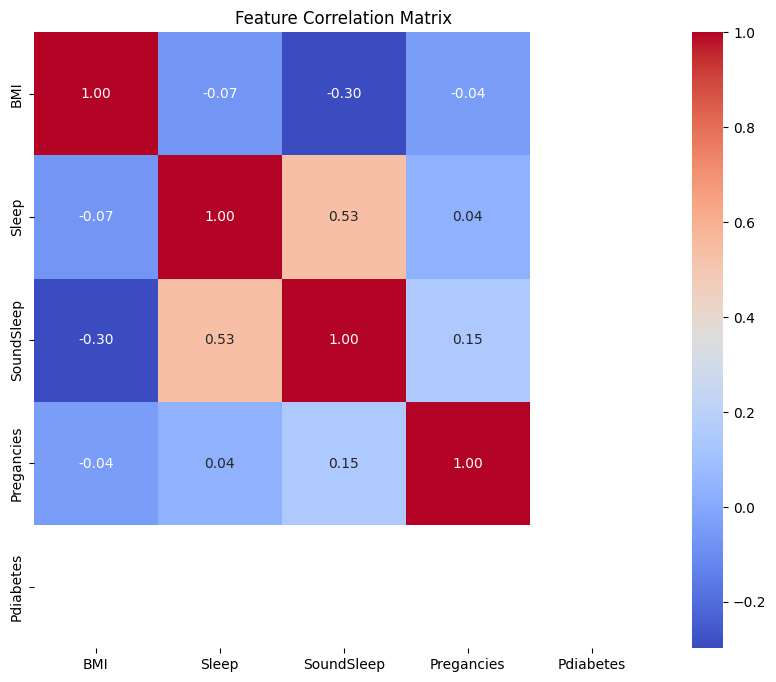

In [14]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data_imputed.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [16]:
# Variance Inflation Factor (VIF) Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_imputed.drop('Sleep', axis=1)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif_data)


Variance Inflation Factor (VIF):
       Feature       VIF
0         BMI  5.658466
1  SoundSleep  5.872975
2  Pregancies  1.215876
3   Pdiabetes       NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


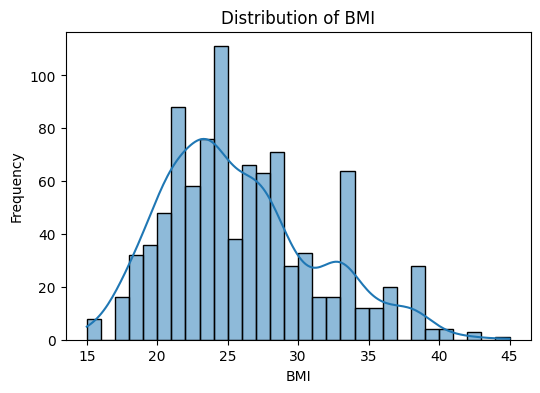

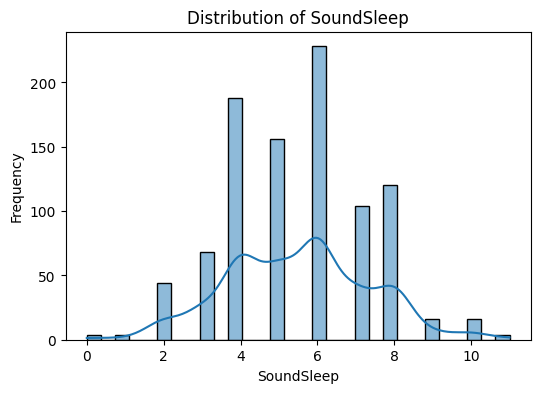

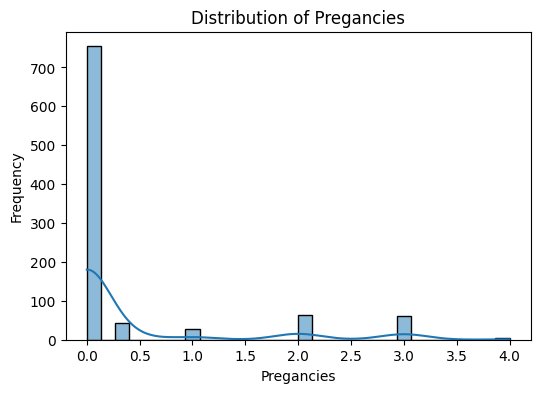

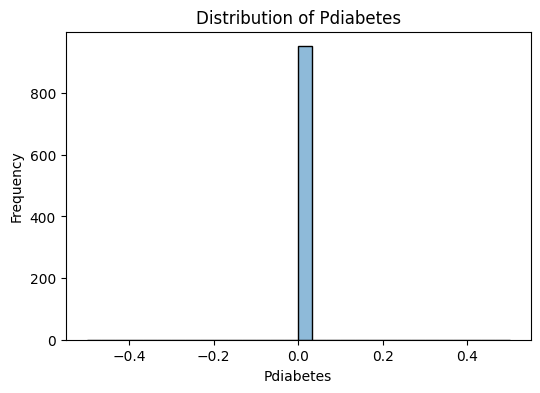

In [17]:
# Univariate Analysis
for column in data_imputed.columns:
    if column != 'Sleep':
        plt.figure(figsize=(6, 4))
        sns.histplot(data_imputed[column], kde=True, bins=30)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()


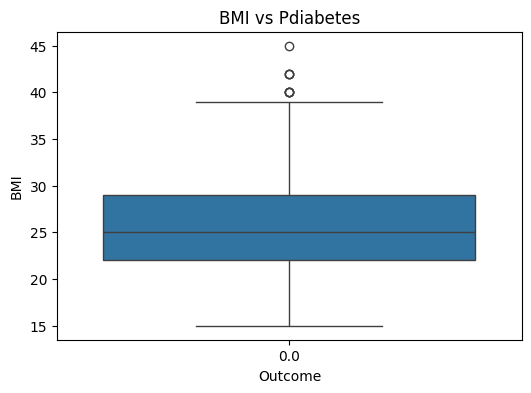

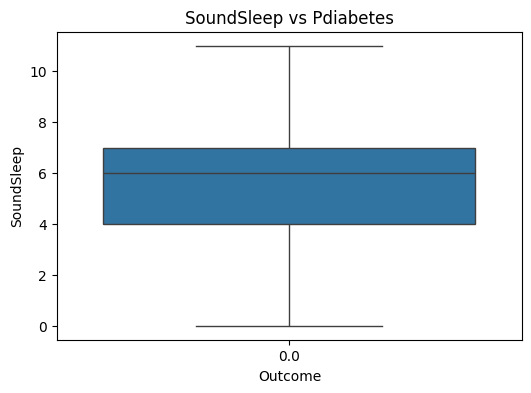

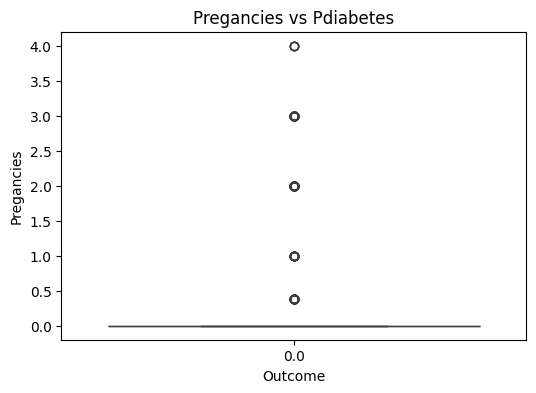

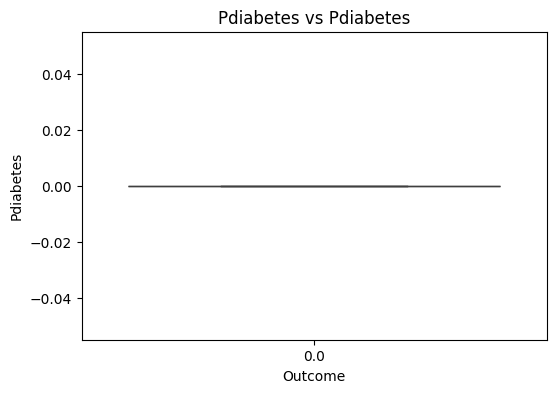

In [19]:
# Bivariate Analysis
for column in data_imputed.columns:
    if column != 'Sleep':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=data_imputed['Pdiabetes'], y=data_imputed[column])
        plt.title(f"{column} vs Pdiabetes")
        plt.xlabel("Outcome")
        plt.ylabel(column)
        plt.show()


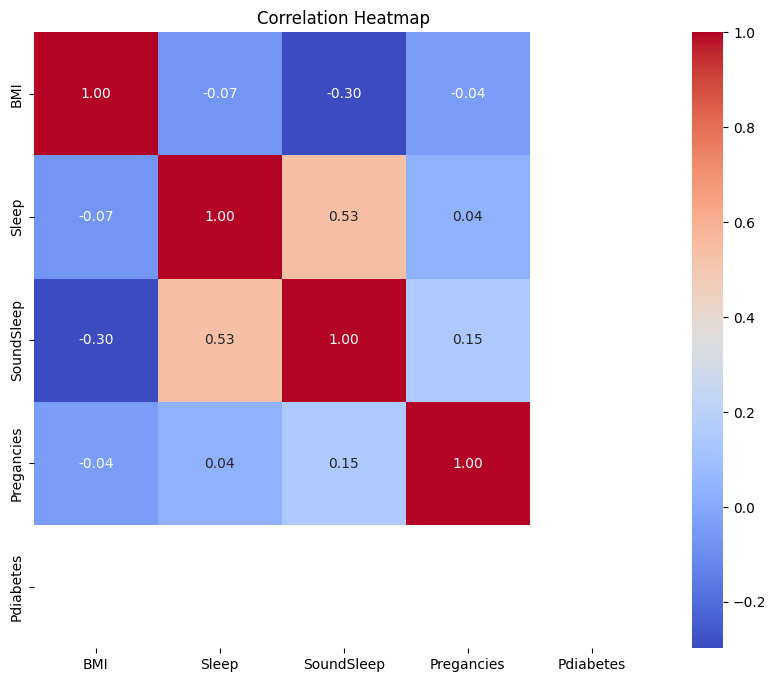

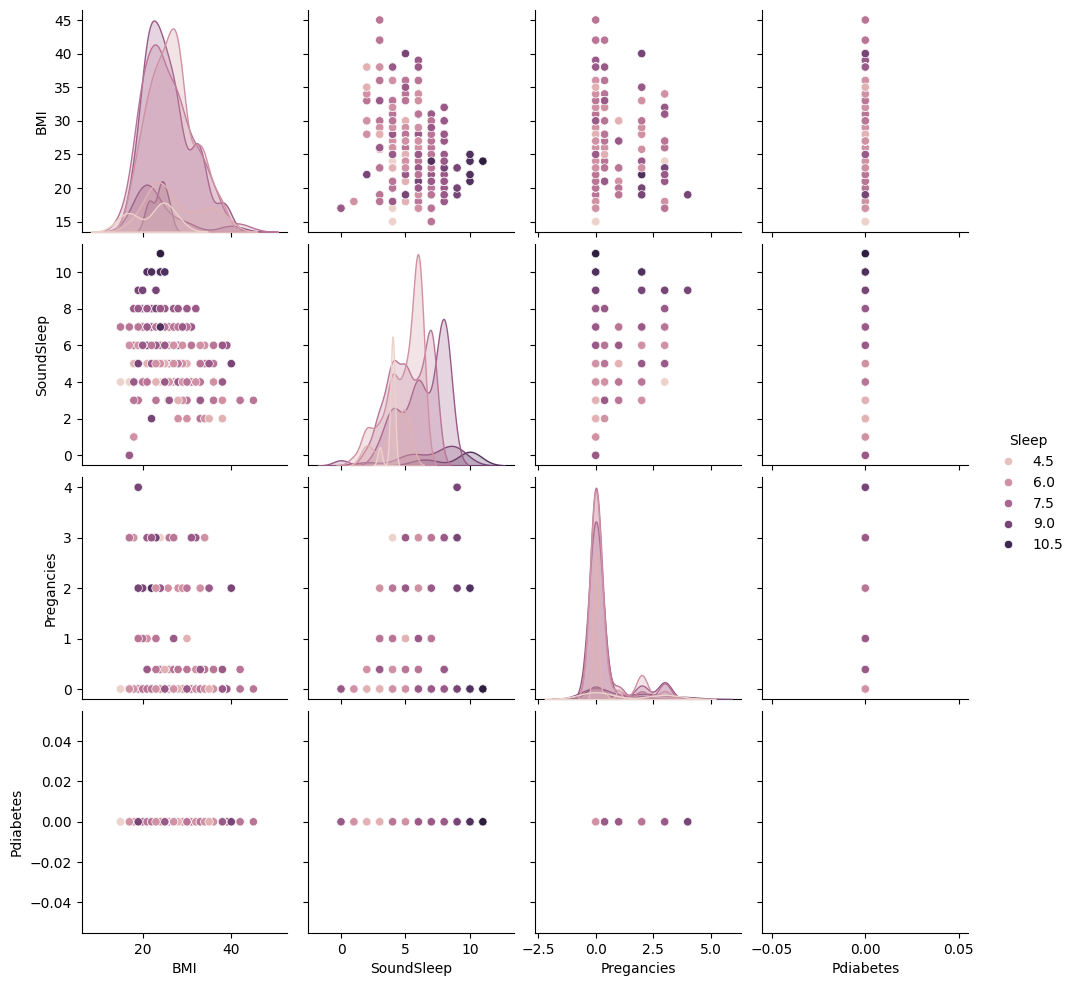

In [21]:
# Multivariate Analysis: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_imputed.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for multivariate relationships (Optional)
sns.pairplot(data_imputed, hue="Sleep", diag_kind="kde")
plt.show()


KNN Classification Report:
              precision    recall  f1-score   support

         4.0       0.71      0.71      0.71         7
         5.0       0.32      0.57      0.41        14
         6.0       0.49      0.61      0.54        46
         7.0       0.71      0.57      0.63        56
         8.0       0.77      0.62      0.69        53
         9.0       0.33      0.36      0.35        11
        10.0       1.00      0.50      0.67         4

    accuracy                           0.59       191
   macro avg       0.62      0.56      0.57       191
weighted avg       0.63      0.59      0.60       191



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classification Report:
              precision    recall  f1-score   support

         4.0       1.00      0.86      0.92         7
         5.0       0.62      0.36      0.45        14
         6.0       0.46      0.78      0.58        46
         7.0       0.60      0.59      0.59        56
         8.0       0.91      0.60      0.73        53
         9.0       1.00      0.64      0.78        11
        10.0       1.00      0.50      0.67         4

    accuracy                           0.63       191
   macro avg       0.80      0.62      0.67       191
weighted avg       0.70      0.63      0.64       191



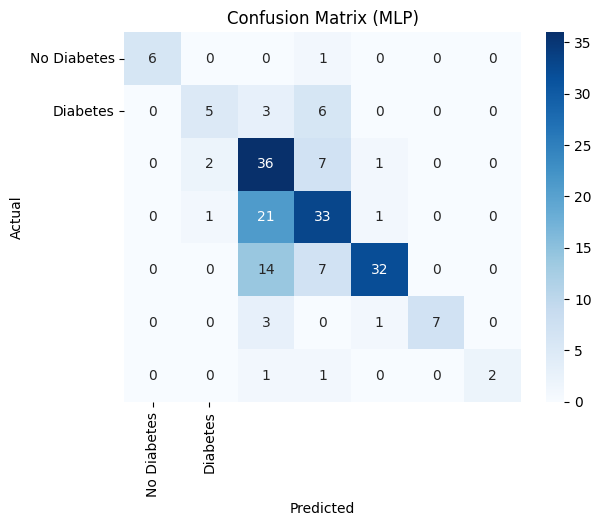

In [22]:
# Splitting the dataset into training and testing sets
X = data_imputed.drop('Sleep', axis=1)
y = data_imputed['Sleep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Multi-Layer Perceptron (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix (MLP)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training KNN Model...
KNN Accuracy: 0.5968586387434555

KNN Classification Report:
              precision    recall  f1-score   support

           4       0.71      0.71      0.71         7
           5       0.40      0.57      0.47        14
           6       0.48      0.61      0.54        46
           7       0.69      0.61      0.65        56
           8       0.77      0.62      0.69        53
           9       0.33      0.36      0.35        11
          10       1.00      0.50      0.67         4

    accuracy                           0.60       191
   macro avg       0.63      0.57      0.58       191
weighted avg       0.63      0.60      0.60       191

Training MLP Model...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 0.6178010471204188

MLP Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.86      0.92         7
           5       0.50      0.36      0.42        14
           6       0.44      0.74      0.55        46
           7       0.62      0.57      0.59        56
           8       0.89      0.60      0.72        53
           9       1.00      0.64      0.78        11
          10       1.00      0.50      0.67         4

    accuracy                           0.62       191
   macro avg       0.78      0.61      0.66       191
weighted avg       0.68      0.62      0.63       191



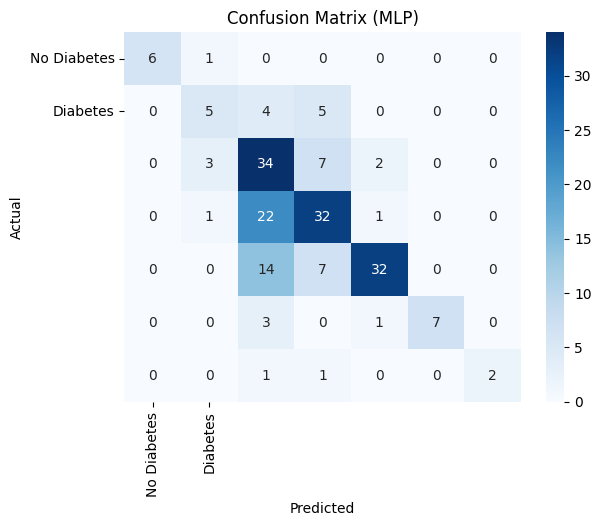

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Define features and target
X = data.drop("Sleep", axis=1)
y = data["Sleep"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Preprocessing Steps
numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())                 # Standardize the data
])

# Apply Preprocessing to Numeric Columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

# Define ML Pipelines
# Pipeline for KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Pipeline for MLP
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42))
])

# Train and Evaluate KNN
print("Training KNN Model...")
knn_pipeline.fit(X_train, y_train)
knn_preds = knn_pipeline.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_preds))

# Train and Evaluate MLP
print("Training MLP Model...")
mlp_pipeline.fit(X_train, y_train)
mlp_preds = mlp_pipeline.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, mlp_preds))
print("\nMLP Classification Report:")
print(classification_report(y_test, mlp_preds))

# Confusion Matrix for MLP
conf_matrix = confusion_matrix(y_test, mlp_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix (MLP)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Conclusion**

The implemented Multi-Layer Perceptron (MLP) model achieved an accuracy of 62% on the testing dataset. While this result demonstrates the model's ability to classify diabetes-related outcomes, it falls short compared to the reported performance in the referenced paper (accuracy of 89.81%, sensitivity of 89.29%, and specificity of 90.38%). A closer examination reveals some critical factors that likely contributed to the discrepancies:



**Factors Affecting Model Performance**

**Dataset Differences**

Different datasets and their quality significantly impact model outcomes.

**Class Imbalance**

Unbalanced data skews predictions toward majority classes, lowering recall for minority outcomes.

**Feature Engineering**

Suboptimal feature scaling and selection reduce the model's ability to learn effectively.

**Hyperparameter Tuning**

Insufficient optimization of model parameters limits its predictive potential.

**Noise and Missing Data**

Data quality issues, including missing values and noise, hinder learning.

**Evaluation Metrics**

Reliance solely on accuracy may overlook critical performance aspects like sensitivity and specificity.

**Recommendations for Improvement**
**Enhanced Preprocessing**

Address missing values and balance the dataset using advanced techniques.

**Better Feature Engineering**

Normalize, scale, and select features to maximize their utility.

**Comprehensive Hyperparameter Tuning**

Optimize model parameters using techniques like grid search or Bayesian optimization.

**Evaluation Metric Expansion**

Incorporate recall, sensitivity, and specificity for a complete performance assessment.

The implemented MLP model achieved 62% accuracy, falling short of the referenced study's performance due to various factors.